# Clustering

Clustering is a technique used to group similar items together.

```{admonition} PCA vs Clustering

PCA: finds a low-dimensional representation <br>
Clustering: finds subgroups among observations

```

## K-Means Clustering

K-means clustering is a widely used unsupervised machine learning algorithm for partitioning a dataset into $ K $ clusters, where each data point belongs to the cluster with the nearest mean (centroid).


### Mathematical Explanation

#### Step-by-Step Process

1. Initialization:
   - Choose the number of clusters $ K $.
   - Initialize $ K $ centroids randomly from the dataset.

2. Assignment Step:
   - Assign each data point to the nearest centroid. This is done by computing the Euclidean distance between each data point and each centroid:
     $$
     \text{distance}(x_i, \mu_j) = \| x_i - \mu_j \|_2
     $$
     where $ x_i $ is a data point and $ \mu_j $ is a centroid.

3. Update Step:
   - Update the centroid of each cluster to be the mean of the data points assigned to that cluster:
     $$
     \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
     $$
     where $ C_j $ is the set of points assigned to the $ j $-th cluster.

4. Convergence:
   - Repeat the Assignment and Update steps until the centroids no longer change significantly or a maximum number of iterations is reached.

### Example

Suppose we have a 2D dataset with the following points: $(1, 2)$, $(3, 4)$, $(5, 6)$, $(8, 8)$, $(9, 10)$, and we want to cluster them into $ K = 2 $ clusters.

1. Initialization:
   - Randomly select initial centroids, e.g., $(1, 2)$ and $(9, 10)$.

2. First Assignment Step:
   - Compute the distances:
     - $(1, 2)$ to $(1, 2)$: $0$
     - $(1, 2)$ to $(9, 10)$: $11.31$
     - $(3, 4)$ to $(1, 2)$: $2.83$
     - $(3, 4)$ to $(9, 10)$: $8.49$
     - $(5, 6)$ to $(1, 2)$: $5.66$
     - $(5, 6)$ to $(9, 10)$: $5.66$
     - $(8, 8)$ to $(1, 2)$: $9.22$
     - $(8, 8)$ to $(9, 10)$: $2.24$

   - Assign points to the nearest centroids:
     - Cluster 1: $(1, 2)$, $(3, 4)$
     - Cluster 2: $(5, 6)$, $(8, 8)$

3. First Update Step:
   - Compute new centroids:
     - Cluster 1: $(2, 3)$
     - Cluster 2: $(6.5, 7)$

4. Repeat until convergence.


This implementation includes:

- Initialization: Randomly selecting initial centroids from the dataset.
- Distance Calculation: Using `torch.cdist` to compute Euclidean distances between points and centroids.
- Label Assignment: Assigning each point to the nearest centroid.
- Centroid Update: Updating centroids to be the mean of the assigned points.
- Convergence Check: Checking if the centroids have stabilized within a tolerance level.

This code can be adapted for different datasets and configurations by adjusting the input tensor `X`, the number of clusters `K`, and the maximum iterations `max_iters`.

In [1]:
import torch

def kmeans(X, K, max_iters=100, tol=1e-4):
    N, D = X.shape
    # Randomly initialize centroids
    centroids = X[torch.randint(0, N, (K,))]
    prev_centroids = centroids.clone()
    
    for i in range(max_iters):
        # Compute distances from points to centroids
        distances = torch.cdist(X, centroids)
        
        # Assign points to the nearest centroid
        labels = torch.argmin(distances, dim=1)
        
        # Update centroids
        new_centroids = torch.stack([X[labels == k].mean(dim=0) for k in range(K)])
        
        # Check for convergence
        if torch.norm(new_centroids - prev_centroids) < tol:
            break
        
        prev_centroids = new_centroids
    
    return labels, new_centroids

X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [8.0, 8.0], [9.0, 10.0]])
K = 2
labels, centroids = kmeans(X, K)
print("Labels:", labels)
print("Centroids:", centroids)

Labels: tensor([0, 0, 0, 0, 0])
Centroids: tensor([[5.2000, 6.0000],
        [   nan,    nan]])


## Hierarchical clustering

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Unlike other clustering methods such as k-means or DBSCAN, hierarchical clustering does not require the number of clusters to be specified in advance. Instead, it provides a dendrogram, a tree-like diagram that illustrates the arrangement of the clusters produced by the algorithm.

There are two main types of hierarchical clustering:

1. Agglomerative (Bottom-Up) Clustering:
    - Starts with each data point as its own individual cluster.
    - Iteratively merges the closest pairs of clusters until all data points are in a single cluster or another stopping criterion is met.
    - This approach is more commonly used in practice.

2. Divisive (Top-Down) Clustering:
    - Starts with all data points in a single cluster.
    - Iteratively splits the most appropriate cluster into smaller clusters until each data point is its own cluster or another stopping criterion is met.
    - This approach is less commonly used due to its computational intensity.
  
### Key Concepts

#### Dendrogram
A dendrogram is a tree-like diagram that records the sequences of merges or splits. In the agglomerative approach, the leaves represent individual data points and the root represents the whole dataset.

#### Distance Metrics
The choice of distance metric is crucial in hierarchical clustering. Common metrics include:

- **Euclidean distance**: $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
- **Manhattan distance**: $d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$

#### Linkage Criteria
Linkage criteria determine the distance between sets of observations as a function of the pairwise distances between observations. Common linkage criteria include:

- **Single linkage (minimum linkage)**: Distance between two clusters is defined as the minimum distance between any single data point in the first cluster and any single data point in the second cluster.
  
  $$
  d(C_i, C_j) = \min \{d(x, y) : x \in C_i, y \in C_j\}
  $$

- **Complete linkage (maximum linkage)**: Distance between two clusters is defined as the maximum distance between any single data point in the first cluster and any single data point in the second cluster.

  $$
  d(C_i, C_j) = \max \{d(x, y) : x \in C_i, y \in C_j\}
  $$

- **Average linkage**: Distance between two clusters is defined as the average distance between all pairs of data points in the two clusters.

  $$
  d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y)
  $$


### Steps in Agglomerative Hierarchical Clustering

1. Compute Distance Matrix:
    - Calculate the distance between every pair of data points using a suitable distance metric (e.g., Euclidean distance, Manhattan distance).

2. Merge Closest Clusters:
    - Identify the two clusters that are closest to each other (i.e., the pair with the smallest distance between them) and merge them into a single cluster.

3. Update Distance Matrix:
    - After merging two clusters, update the distance matrix to reflect the distances between the new cluster and all other clusters. There are several methods to compute the distance between clusters, known as linkage criteria:
        - Single Linkage (Minimum Linkage): Distance between the closest points of the two clusters.
        - Complete Linkage (Maximum Linkage): Distance between the furthest points of the two clusters.
        - Average Linkage: Average distance between all pairs of points in the two clusters.
        - Centroid Linkage: Distance between the centroids (mean points) of the two clusters.
        - Ward’s Method: Minimizes the increase in total within-cluster variance when two clusters are merged.

4. Repeat Steps 2 and 3:
    - Continue merging clusters and updating the distance matrix until all data points are combined into a single cluster.

### Dendrogram

- The results of hierarchical clustering are usually presented in the form of a dendrogram.
- A dendrogram is a tree-like diagram that records the sequences of merges or splits.
- The y-axis of the dendrogram represents the distance or dissimilarity at which merges occur.
- By cutting the dendrogram at a desired height, a specific number of clusters can be obtained.

### Advantages of Hierarchical Clustering

- No need to specify the number of clusters: Unlike k-means, which requires the number of clusters to be specified in advance, hierarchical clustering produces a complete hierarchy of clusters which can be chosen after inspecting the dendrogram.
- Hierarchical nature: Naturally captures the nested structure of data, providing a detailed and interpretable hierarchy.
- Any shape: Can capture complex cluster shapes, unlike k-means which assumes spherical clusters.

### Disadvantages of Hierarchical Clustering

- Computational Complexity: The time complexity is $O(n^3)$ and space complexity is $O(n^2)$, making it less suitable for very large datasets.
- Lack of scalability: Not suitable for large datasets due to the high computational cost.
- No direct optimization: Unlike k-means, which optimizes the clustering objective function, hierarchical clustering does not have a direct optimization criterion.

### Practical Applications

Hierarchical clustering is widely used in various fields, including:

- Genomics: To cluster genes or proteins that have similar expression patterns.
- Image segmentation: Grouping pixels with similar colors or textures.
- Market research: To identify distinct groups of consumers based on purchasing behavior.
- Document clustering: Organizing a large set of documents into topics or categories.

### Example

Here’s a simple example of agglomerative hierarchical clustering:

1. Initial Clusters: Each point is its own cluster.
    ```
    A  B  C  D
    ```

2. Calculate Distance Matrix:
    ```
       A    B    C    D
    A  0   10   20   30
    B 10    0   25   35
    C 20   25    0   15
    D 30   35   15    0
    ```

3. Merge Closest Clusters:
    - Merge A and B (distance 10).
    - New clusters: {A, B}, C, D

4. Update Distance Matrix:
    ```
             {A,B}  C   D
    {A,B}      0    22.5 32.5
    C        22.5    0   15
    D        32.5   15    0
    ```

5. Continue Merging:
    - Merge C and D (distance 15).
    - New clusters: {A, B}, {C, D}

6. Update Distance Matrix:
    ```
             {A,B} {C,D}
    {A,B}      0     27.5
    {C,D}    27.5      0
    ```

7. Final Merge:
    - Merge {A, B} and {C, D} (distance 27.5).
    - Final cluster: {A, B, C, D}

### Visualization: Dendrogram

A dendrogram can be used to visualize the hierarchy of clusters formed:
```
         _________
        |         |
     ___|___      |
    |     |  |    |
    A     B  C    D
```

By examining the dendrogram, you can choose a height to cut the tree and determine the number of clusters that best fits the data. For instance, cutting the tree at a height of 15 would result in two clusters: {A, B} and {C, D}.


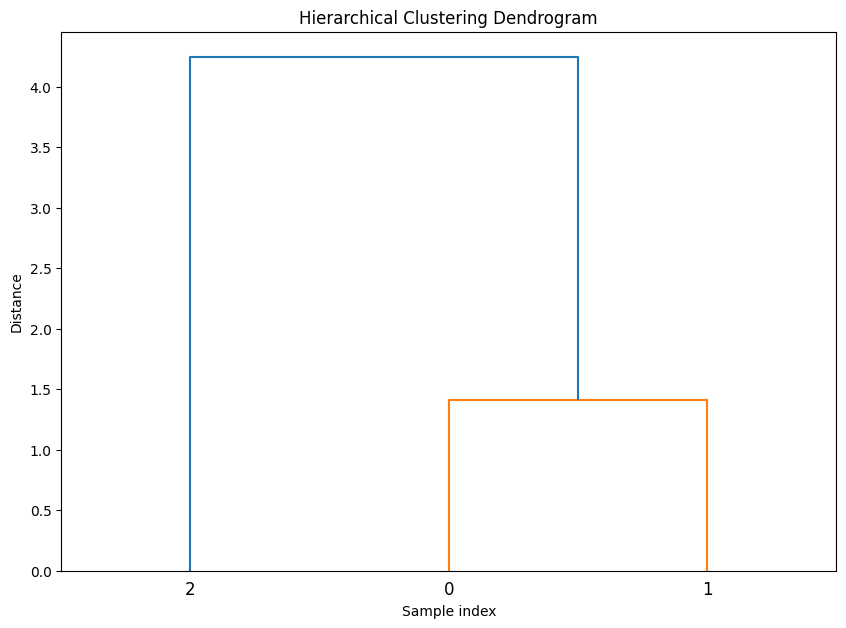

In [2]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Sample data points
points = torch.tensor([
    [1.0, 1.0],
    [2.0, 2.0],
    [5.0, 5.0]
])

# Convert to numpy array for scipy functions
points_np = points.numpy()

# Perform hierarchical/agglomerative clustering
linkage_matrix = sch.linkage(points_np, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


# In this code:

# - We define our sample points using PyTorch tensors.
# - We convert these points to a NumPy array for compatibility with SciPy's clustering functions.
# - We perform hierarchical clustering using the `linkage` function from SciPy with the single linkage method.
# - We plot the dendrogram to visualize the hierarchical clustering process.

